# Creación de los gráficos

In [7]:
import matplotlib.pyplot as plt
import json
import os
import numpy as np
from autorank import autorank, plot_stats, create_report, latex_table

# Creación gráficas MAPE

In [157]:
def stackedBars(title, path, colors, modelos):
    mape_values = []
    r2_values = []
    datasets = []

    for archivo in os.listdir(path):

        datasets.append(archivo.split("_merged")[0])

        # Leemos los datos de MAPE para el grafico
        with open(f"SplitConstant03-10-24/resultados/ANN/{os.path.splitext(archivo)[0]}_best_models_updated_no_train.json", "r") as f:
            ANN_data = json.load(f)
            ANN_mape = ANN_data[0][f"MAPE_{title}"]
            ANN_r2 = ANN_data[0][f"R2_{title}"]

        with open(f"SplitConstant03-10-24/resultados/GBT/{os.path.splitext(archivo)[0]}_best_models_updated_no_train.json", "r") as f:
            GBT_data = json.load(f)
            GBT_mape = GBT_data[0][f"MAPE_{title}"]
            GBT_r2 = GBT_data[0][f"R2_{title}"]        

        with open(f"SplitConstant03-10-24/resultados/LR/{os.path.splitext(archivo)[0]}_best_models_updated_no_train.json", "r") as f:
            LR_data = json.load(f)
            LR_mape = LR_data[0][f"MAPE_{title}"]
            LR_r2 = LR_data[0][f"R2_{title}"]

        with open(f"SplitConstant03-10-24/resultados/LSTMJupiter/{os.path.splitext(archivo)[0]}_best_models_updated_no_train.json", "r") as f:
            LSTM_data = json.load(f)
            LSTM_mape = LSTM_data[0][f"{title}_mape"]
            LSTM_r2 = LSTM_data[0][f"{title}_r2"]

        with open(f"SplitConstant03-10-24/resultados/RF/{os.path.splitext(archivo)[0]}_best_models_updated_no_train.json", "r") as f:
            RF_data = json.load(f)
            RF_mape = RF_data[0][f"MAPE_{title}"]
            RF_r2 = RF_data[0][f"R2_{title}"]

        with open(f"SplitConstant03-10-24/resultados/SVM/{os.path.splitext(archivo)[0]}_best_models_updated_no_train.json", "r") as f:
            SVM_data = json.load(f)
            SVM_mape = SVM_data[0][f"MAPE_{title}"]
            SVM_r2 = SVM_data[0][f"R2_{title}"]

        with open(f"SplitConstant03-10-24/resultados/TCNN/{os.path.splitext(archivo)[0]}.csv_best_models_updated_no_train.json", "r") as f:
            TCNN_data = json.load(f)
            TCNN_mape = TCNN_data[0][f"{title}_mape"]
            TCNN_r2 = TCNN_data[0][f"{title}_r2"]
    
        mape_values.append([TCNN_mape, LSTM_mape, ANN_mape, RF_mape, GBT_mape, SVM_mape, LR_mape])
        r2_values.append([TCNN_r2, LSTM_r2, ANN_r2, RF_r2, GBT_r2, SVM_r2, LR_r2])

    # Ordenado de los archivos
    desired_order = [
    "totalMerged.csv", "Abies spectabilis", "Cedrus deodara","Picea smithiana", "Tsuga dumosa", 
    "Juniperus spp. ", "Abies pindrow", "Pinus roxburghii", "Pinus gerardiana", "Pinus wallichiana",
    "Juniperus excelsa M.-Bieb", "Juniperus spp. L.", "Juniperus turkestanica Komar.", "Juniperus recurva", "Betula utilis", 
    "Populus ciliata"
    ]


    # Diccionario de etiquetas personalizadas
    label_mapping = {
        "Juniperus excelsa M.-Bieb": "Juniperus excelsa",
        "Juniperus turkestanica Komar.": "Juniperus turkestanica",
        "totalMerged.csv": "Merged"
    }

    data_dict = {}
    for i in range(len(datasets)):
        data_dict[datasets[i]] = {
            'mape_values': mape_values[i],
            'r2_values': r2_values[i]
        }

    # Ordenamos las listas
    datasets_ordered = []
    mape_values_ordered = []
    r2_values_ordered = []

    for dataset in desired_order:
        if dataset in data_dict:
            datasets_ordered.append(dataset)
            mape_values_ordered.append(data_dict[dataset]['mape_values'])
            r2_values_ordered.append(data_dict[dataset]['r2_values'])
        else:
            print(f"Dataset '{dataset}' no encontrado en data_dict")

    # Crear gráfico de barras apiladas
    plt.figure(figsize=(15, 8))

    x_positions = range(len(datasets_ordered))

    for idx, (x, dataset, mape_values_dataset) in enumerate(zip(x_positions, datasets_ordered, mape_values_ordered)):
        # Obtener la etiqueta personalizada si existe
        label = label_mapping.get(dataset, dataset)
        
        # Normalizar los valores de MAPE para el dataset actual
        total_mape = sum(mape_values_dataset)
        mape_percentages = [(mape / total_mape) * 100 for mape in mape_values_dataset]

        bottom_value = 0
        for i, (mape, percentage) in enumerate(zip(mape_values_dataset, mape_percentages)):
            plt.bar(x, percentage, bottom=bottom_value, color=colors[i], label=modelos[i] if idx == 0 else "")
            
            # Mostrar solo el valor de MAPE dentro de cada barra
            plt.text(x, bottom_value + percentage / 2, f'{percentage:.2f}', ha='center', va='center', color='white', fontweight='bold')
            bottom_value += percentage

    # Establecer las etiquetas del eje X con las etiquetas personalizadas
    plt.xticks(x_positions, [label_mapping.get(dataset, dataset) for dataset in datasets_ordered], rotation=60)

    # Ajustar el rango del eje Y al 100%
    plt.ylim(0, 100)

    # Añadir etiquetas y título
    plt.xticks(rotation=60)
    plt.xlabel('Datasets')
    plt.ylabel('MAPE distribution (%)')

    # Mostrar la leyenda de los modelos (solo una vez)
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', title='Models')

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

# Creación gráficas RMSE

In [158]:
def stackedBarsRMSE(title, path, colors, modelos):
    mape_values = []
    r2_values = []
    rmse_values = []
    datasets = []

    for archivo in os.listdir(path):

        datasets.append(archivo.split("_merged")[0])

            # Leemos los datos de MAPE para el grafico
        with open(f"SplitConstant03-10-24/resultados/ANN/{os.path.splitext(archivo)[0]}_best_models_updated_no_train.json", "r") as f:
            ANN_data = json.load(f)
            ANN_mape = ANN_data[0][f"MAPE_{title}"]
            ANN_rmse = ANN_data[0][f"RMSE_{title}"]
            ANN_r2 = ANN_data[0][f"R2_{title}"]

        with open(f"SplitConstant03-10-24/resultados/GBT/{os.path.splitext(archivo)[0]}_best_models_updated_no_train.json", "r") as f:
            GBT_data = json.load(f)
            GBT_mape = GBT_data[0][f"MAPE_{title}"]
            GBT_rmse = GBT_data[0][f"RMSE_{title}"]
            GBT_r2 = GBT_data[0][f"R2_{title}"]        

        with open(f"SplitConstant03-10-24/resultados/LR/{os.path.splitext(archivo)[0]}_best_models_updated_no_train.json", "r") as f:
            LR_data = json.load(f)
            LR_mape = LR_data[0][f"MAPE_{title}"]
            LR_rmse = LR_data[0][f"RMSE_{title}"]
            LR_r2 = LR_data[0][f"R2_{title}"]

        with open(f"SplitConstant03-10-24/resultados/LSTMJupiter/{os.path.splitext(archivo)[0]}_best_models_updated_no_train.json", "r") as f:
            LSTM_data = json.load(f)
            LSTM_mape = LSTM_data[0][f"{title}_mape"]
            LSTM_rmse = LSTM_data[0][f"{title}_rmse"]
            LSTM_r2 = LSTM_data[0][f"{title}_r2"]

        with open(f"SplitConstant03-10-24/resultados/RF/{os.path.splitext(archivo)[0]}_best_models_updated_no_train.json", "r") as f:
            RF_data = json.load(f)
            RF_mape = RF_data[0][f"MAPE_{title}"]
            RF_rmse = RF_data[0][f"RMSE_{title}"]
            RF_r2 = RF_data[0][f"R2_{title}"]

        with open(f"SplitConstant03-10-24/resultados/SVM/{os.path.splitext(archivo)[0]}_best_models_updated_no_train.json", "r") as f:
            SVM_data = json.load(f)
            SVM_mape = SVM_data[0][f"MAPE_{title}"]
            SVM_rmse = SVM_data[0][f"RMSE_{title}"]
            SVM_r2 = SVM_data[0][f"R2_{title}"]

        with open(f"SplitConstant03-10-24/resultados/TCNN/{os.path.splitext(archivo)[0]}.csv_best_models_updated_no_train.json", "r") as f:
            TCNN_data = json.load(f)
            TCNN_mape = TCNN_data[0][f"{title}_mape"]
            TCNN_rmse = TCNN_data[0][f"{title}_rmse"]
            TCNN_r2 = TCNN_data[0][f"{title}_r2"]

        mape_values.append([TCNN_mape, LSTM_mape, ANN_mape, RF_mape, GBT_mape, SVM_mape, LR_mape])
        r2_values.append([TCNN_r2, LSTM_r2, ANN_r2, RF_r2, GBT_r2, SVM_r2, LR_r2])
        rmse_values.append([TCNN_rmse, LSTM_rmse, ANN_rmse, RF_rmse, GBT_rmse, SVM_rmse, LR_rmse])

    # Ordenado de los archivos
    desired_order = [
    "totalMerged.csv", "Abies spectabilis", "Cedrus deodara","Picea smithiana", "Tsuga dumosa", 
    "Juniperus spp. ", "Abies pindrow", "Pinus roxburghii", "Pinus gerardiana", "Pinus wallichiana",
    "Juniperus excelsa M.-Bieb", "Juniperus spp. L.", "Juniperus turkestanica Komar.", "Juniperus recurva", "Betula utilis", 
    "Populus ciliata"
    ]


    # Diccionario de etiquetas personalizadas
    label_mapping = {
        "Juniperus excelsa M.-Bieb": "Juniperus excelsa",
        "Juniperus turkestanica Komar.": "Juniperus turkestanica",
        "totalMerged.csv": "Merged"
    }

    data_dict = {}
    for i in range(len(datasets)):
        data_dict[datasets[i]] = {
            'mape_values': mape_values[i],
            'r2_values': r2_values[i],
            'rmse_values': rmse_values[i]
        }

    # Ordenamos las listas
    datasets_ordered = []
    mape_values_ordered = []
    r2_values_ordered = []
    rmse_values_ordered = []

    for dataset in desired_order:
        if dataset in data_dict:
            datasets_ordered.append(dataset)
            mape_values_ordered.append(data_dict[dataset]['mape_values'])
            r2_values_ordered.append(data_dict[dataset]['r2_values'])
            rmse_values_ordered.append(data_dict[dataset]['rmse_values'])
        else:
            print(f"Dataset '{dataset}' no encontrado en data_dict")

    # Crear gráfico de barras apiladas
    plt.figure(figsize=(15, 8))

    x_positions = range(len(datasets_ordered))

    for idx, (x, dataset, mape_values_dataset) in enumerate(zip(x_positions, datasets_ordered, rmse_values_ordered)):
        # Obtener la etiqueta personalizada si existe
        label = label_mapping.get(dataset, dataset)
        
        # Normalizar los valores de MAPE para el dataset actual
        total_mape = sum(mape_values_dataset)
        mape_percentages = [(mape / total_mape) * 100 for mape in mape_values_dataset]

        bottom_value = 0
        for i, (mape, percentage) in enumerate(zip(mape_values_dataset, mape_percentages)):
            plt.bar(x, percentage, bottom=bottom_value, color=colors[i], label=modelos[i] if idx == 0 else "")
            
            # Mostrar solo el valor de MAPE dentro de cada barra
            plt.text(x, bottom_value + percentage / 2, f'{percentage:.2f}', ha='center', va='center', color='white', fontweight='bold')
            bottom_value += percentage

    # Establecer las etiquetas del eje X con las etiquetas personalizadas
    plt.xticks(x_positions, [label_mapping.get(dataset, dataset) for dataset in datasets_ordered], rotation=60)

    # Ajustar el rango del eje Y al 100%
    plt.ylim(0, 100)

    # Añadir etiquetas y título
    plt.xticks(rotation=60)
    plt.xlabel('Datasets')
    plt.ylabel('RMSE distribution')

    # Mostrar la leyenda de los modelos (solo una vez)
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', title='Models')

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

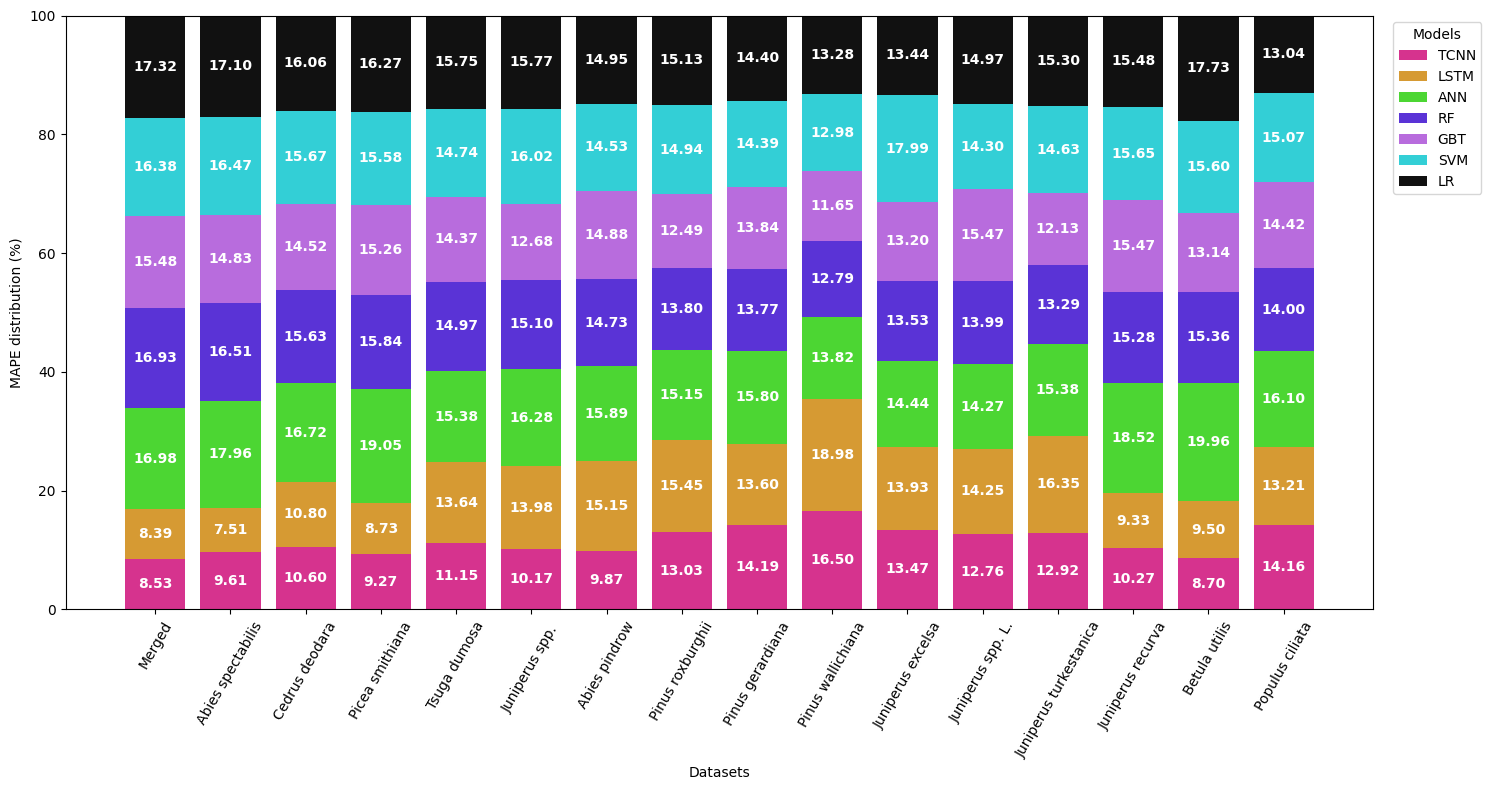

In [159]:
# Array para almacenar los datos
modelos = ['TCNN', 'LSTM', 'ANN', 'RF', 'GBT', 'SVM', 'LR']

# Asignar colores a cada modelo
colors = ['#d6338e', '#d69a33', '#4cd633', '#5a33d6', '#b86cdd', '#33cfd6', '#111111']

stackedBars("test", "../../Datasets/RCPMerged", colors, modelos)

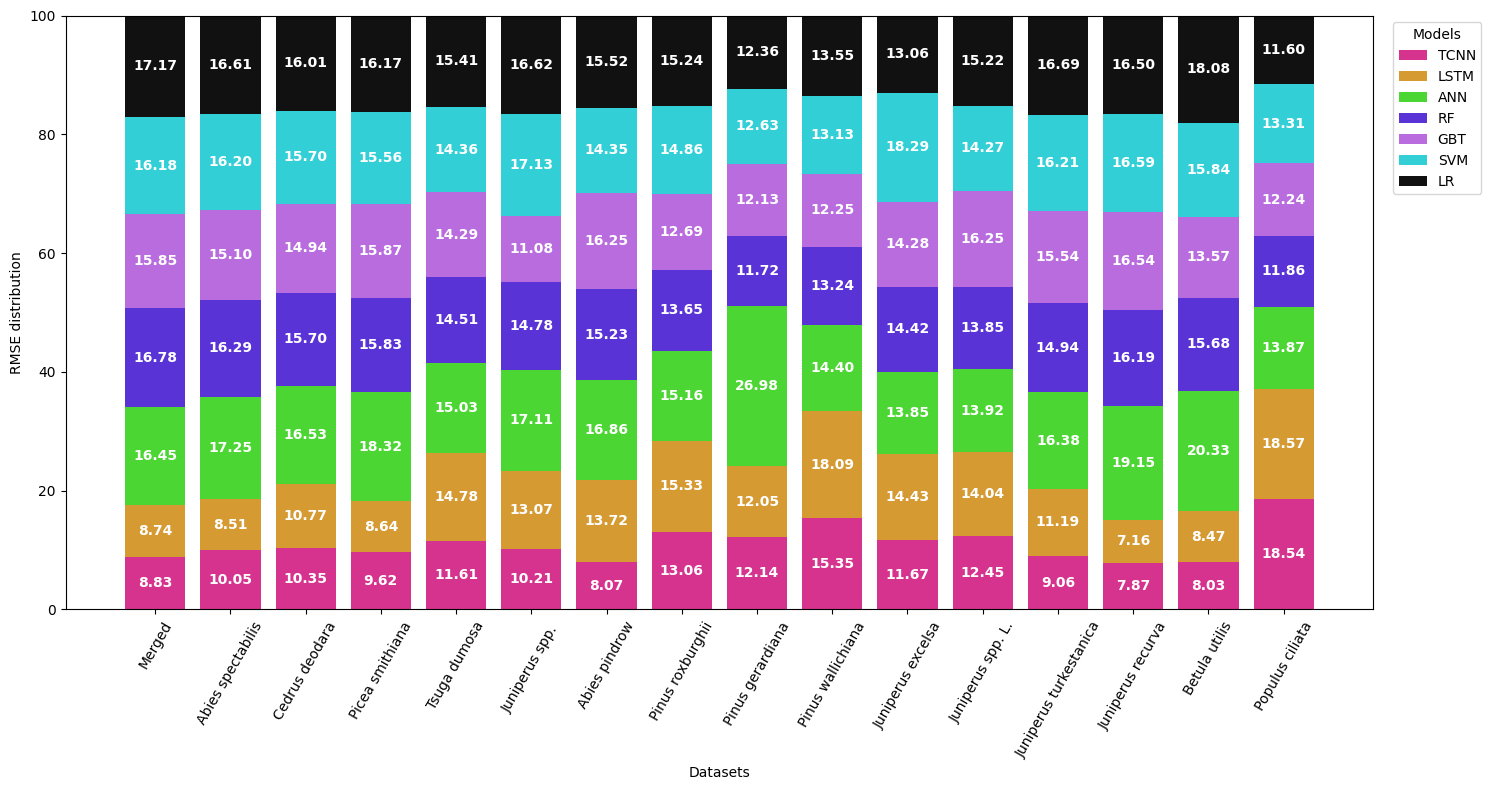

In [160]:
stackedBarsRMSE("test", "../../Datasets/RCPMerged", colors, modelos)

# Creación gráficas R2

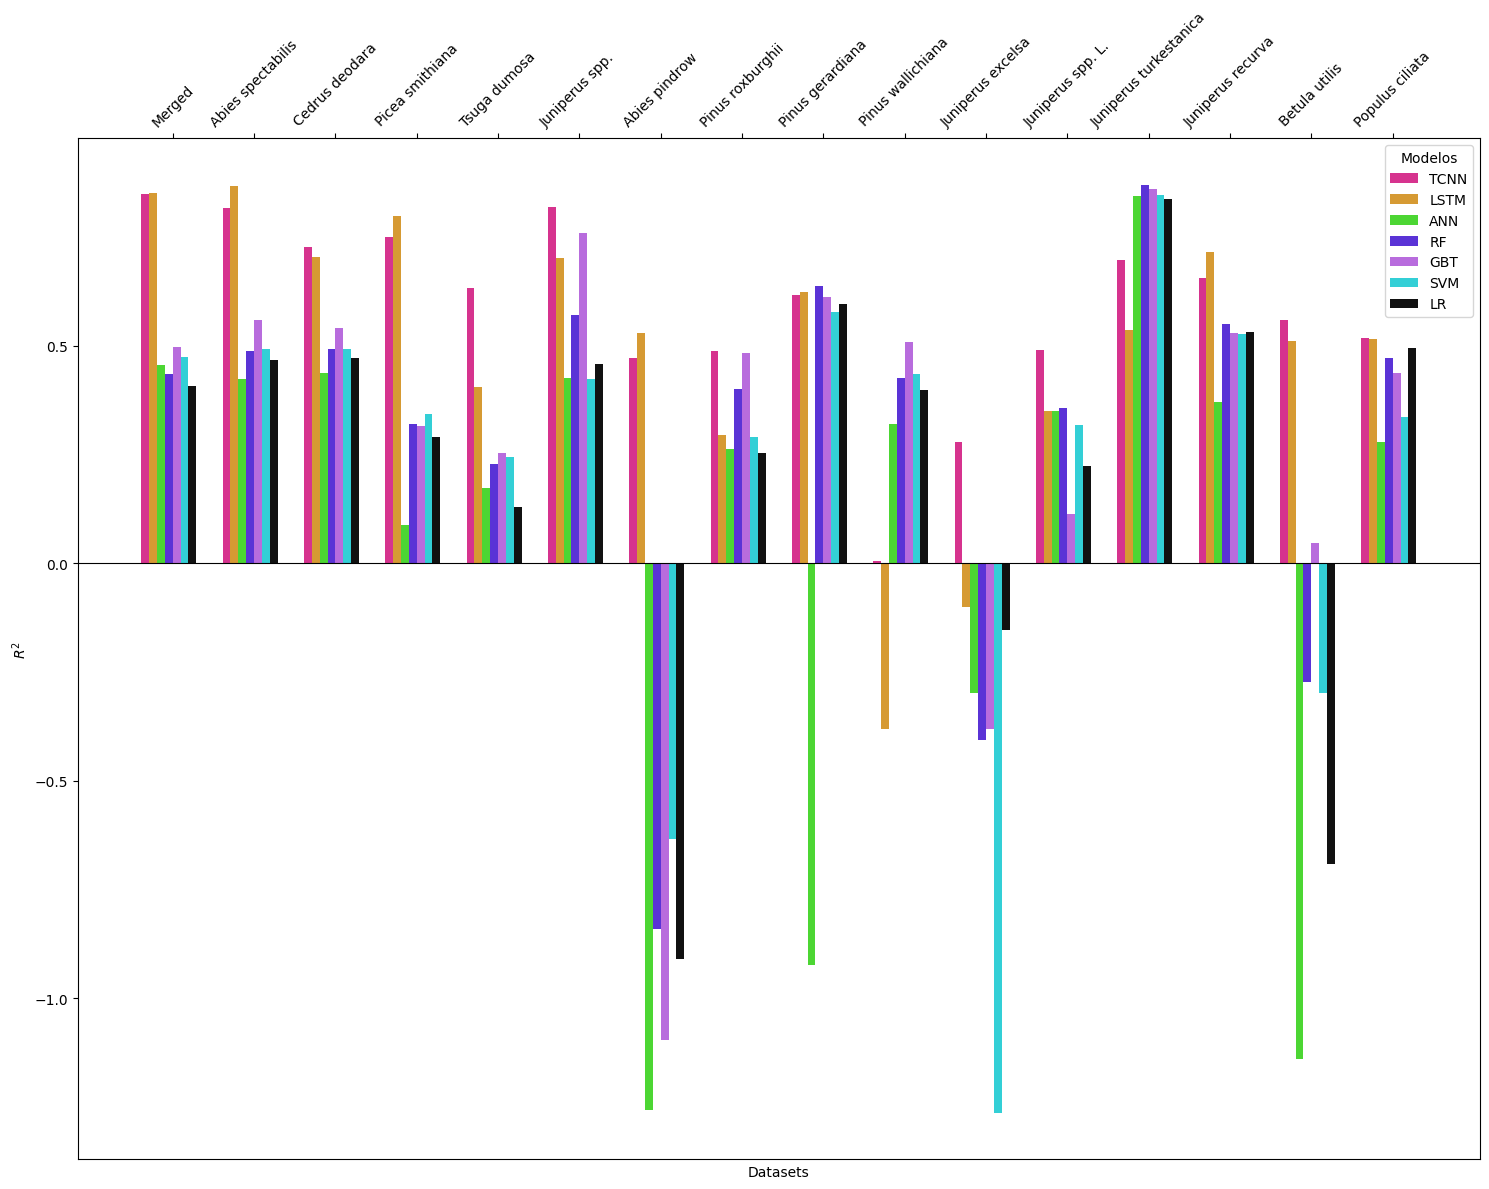

In [161]:
mape_values = []
r2_values = []
datasets = []
title = "test"
path = "../../Datasets/RCPMerged"

for archivo in os.listdir(path):

    datasets.append(archivo.split("_merged")[0])

    # Leemos los datos de MAPE para el grafico
    with open(f"SplitConstant03-10-24/resultados/ANN/{os.path.splitext(archivo)[0]}_best_models_updated_no_train.json", "r") as f:
        ANN_data = json.load(f)
        ANN_mape = ANN_data[0][f"MAPE_{title}"]
        ANN_r2 = ANN_data[0][f"R2_{title}"]

    with open(f"SplitConstant03-10-24/resultados/GBT/{os.path.splitext(archivo)[0]}_best_models_updated_no_train.json", "r") as f:
        GBT_data = json.load(f)
        GBT_mape = GBT_data[0][f"MAPE_{title}"]
        GBT_r2 = GBT_data[0][f"R2_{title}"]        

    with open(f"SplitConstant03-10-24/resultados/LR/{os.path.splitext(archivo)[0]}_best_models_updated_no_train.json", "r") as f:
        LR_data = json.load(f)
        LR_mape = LR_data[0][f"MAPE_{title}"]
        LR_r2 = LR_data[0][f"R2_{title}"]

    with open(f"SplitConstant03-10-24/resultados/LSTMJupiter/{os.path.splitext(archivo)[0]}_best_models_updated_no_train.json", "r") as f:
        LSTM_data = json.load(f)
        LSTM_mape = LSTM_data[0][f"{title}_mape"]
        LSTM_r2 = LSTM_data[0][f"{title}_r2"]

    with open(f"SplitConstant03-10-24/resultados/RF/{os.path.splitext(archivo)[0]}_best_models_updated_no_train.json", "r") as f:
        RF_data = json.load(f)
        RF_mape = RF_data[0][f"MAPE_{title}"]
        RF_r2 = RF_data[0][f"R2_{title}"]

    with open(f"SplitConstant03-10-24/resultados/SVM/{os.path.splitext(archivo)[0]}_best_models_updated_no_train.json", "r") as f:
        SVM_data = json.load(f)
        SVM_mape = SVM_data[0][f"MAPE_{title}"]
        SVM_r2 = SVM_data[0][f"R2_{title}"]

    with open(f"SplitConstant03-10-24/resultados/TCNN/{os.path.splitext(archivo)[0]}.csv_best_models_updated_no_train.json", "r") as f:
        TCNN_data = json.load(f)
        TCNN_mape = TCNN_data[0][f"{title}_mape"]
        TCNN_r2 = TCNN_data[0][f"{title}_r2"]

    mape_values.append([TCNN_mape, LSTM_mape, ANN_mape, RF_mape, GBT_mape, SVM_mape, LR_mape])
    r2_values.append([TCNN_r2, LSTM_r2, ANN_r2, RF_r2, GBT_r2, SVM_r2, LR_r2])


# Ordenación manual de los datasets
desired_order = [
    "totalMerged.csv", "Abies spectabilis", "Cedrus deodara","Picea smithiana", "Tsuga dumosa", 
    "Juniperus spp. ", "Abies pindrow", "Pinus roxburghii", "Pinus gerardiana", "Pinus wallichiana",
    "Juniperus excelsa M.-Bieb", "Juniperus spp. L.", "Juniperus turkestanica Komar.", "Juniperus recurva", "Betula utilis", 
    "Populus ciliata"
]

# Modify the dataset names for the graph
modified_datasets = [
    "Juniperus excelsa" if dataset == "Juniperus excelsa M.-Bieb" else
    "Juniperus turkestanica" if dataset == "Juniperus turkestanica Komar." else 
    "Merged" if dataset == "totalMerged.csv" else dataset
    for dataset in desired_order
]

# Reorder the datasets and values according to the desired order
reordered_mape_values = [mape_values[datasets.index(dataset)] for dataset in desired_order]
reordered_r2_values = [r2_values[datasets.index(dataset)] for dataset in desired_order]

# Now use the modified dataset names and reordered data in the plotting code

# Posición de las barras para cada dataset
bar_width = 0.15
space_between_datasets = 0.5  # Espacio entre los grupos de barras
index = np.arange(len(modified_datasets)) * (len(modelos) * bar_width + space_between_datasets)

# Crear la figura y los ejes
plt.figure(figsize=(15, 12))

# Dibujar las barras para cada modelo
for i, modelo in enumerate(modelos):
    plt.bar(index + i * bar_width, [r2[i] for r2 in reordered_r2_values], bar_width, label=modelo, color=colors[i])

# Añadir etiquetas y título
plt.xlabel('Datasets')
plt.ylabel('$R^2$')
plt.xticks(index + (len(modelos) / 2) * bar_width, modified_datasets, rotation=45)

# Colocar los ticks en la parte superior
plt.gca().xaxis.set_ticks_position('top')  # Mover los ticks al tope
plt.gca().xaxis.tick_top()

plt.axhline(0, color='black', linewidth=0.8)  # Añadir línea en el eje Y=0

# Añadir leyenda
plt.legend(title='Modelos')

# Mostrar el gráfico
plt.tight_layout()
plt.show()